In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import cv2

In [21]:
def generate_shape(shape,img_size=32):
    img = np.zeros((img_size,img_size),dtype=np.uint8)
    if shape=='circle':
        cv2.circle(img,(img_size//2,img_size//2),img_size//4,255,-1)
    elif shape=="rectangle":
        cv2.rectangle(img,(img_size//4,img_size//4),(img_size*3//4,img_size*3//4),255,-1)
    elif shape=='traingle':
        pts = np.array([[img_size//2,5],[5,img_size-5],[img_size-5,img_size-5]],np.int32)
        cv2.drawContours(img,[pts],0,255,-1)
    return img

In [22]:
def create_dataset(n_per_class=200):
    data = []
    labels = []
    shapes  = ['circle','rectangle','triangle']


    for i,shape in enumerate(shapes):
        for _ in range(n_per_class):
            img = generate_shape(shape)
            noise = np.random.normal(0,10,img.shape).astype(np.uint8)
            noisy_img = cv2.add(img,noise)
            data.append(noisy_img.flatten())
            labels.append(i)
    return np.array(data),np.array(labels),shapes

In [23]:
def evaluate(y_true,y_pred,title,labels):
    print(f"Classification Report \n")
    print(classification_report(y_true,y_pred,target_names=labels))

    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,fmt='d',cmap="Blues",xticklabels=labels,yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion matrix for {title}")
    plt.show()

In [24]:
X,y,labels = create_dataset()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

Classification Report 

              precision    recall  f1-score   support

      circle       1.00      0.96      0.98        69
   rectangle       0.93      1.00      0.96        53
    triangle       1.00      0.98      0.99        58

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



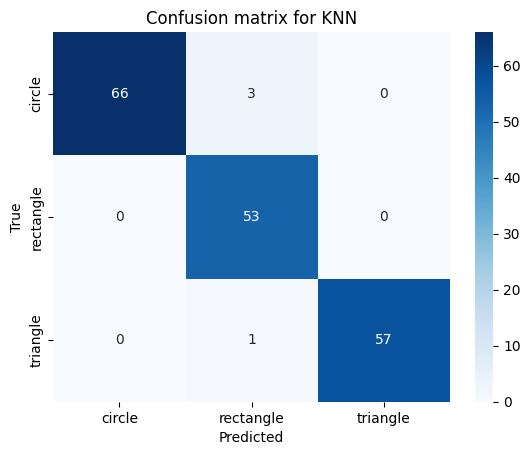

In [28]:
evaluate(y_test,y_pred,"KNN",labels)

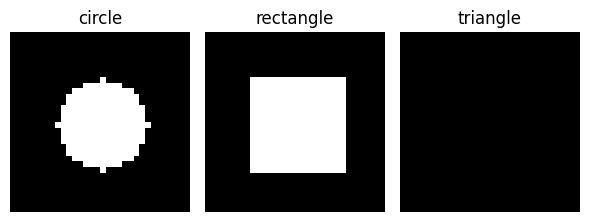

In [29]:
plt.figure(figsize=(6,6))
for i,s in enumerate(labels):
    plt.subplot(1,3,i+1)
    plt.imshow(generate_shape(s),cmap='gray')
    plt.title(s)
    plt.axis('off')
plt.tight_layout()
plt.show()